# Pearson's  Pairwise Correlation

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022

## Executive Summary
  
---

Remember, categorical vars cannot be used in a Pearson's correlation

Pearson's correlation coefficient is appropriate when:

    Both variables are continuous: Pearson's correlation coefficient is appropriate only when both variables are continuous. If one or both variables are categorical, ordinal or discrete, other correlation measures such as Spearman's rank correlation or Kendall's tau correlation may be more appropriate.

    Linear relationship: Pearson's correlation coefficient measures only the strength and direction of the linear relationship between two variables. If the relationship between two variables is non-linear, Pearson's correlation coefficient may not be appropriate.

    No outliers: Pearson's correlation coefficient is sensitive to outliers. If there are outliers in the data, Pearson's correlation coefficient may not be appropriate.

    No violation of assumptions: Pearson's correlation coefficient assumes that the data is normally distributed, and that the variance of the two variables is equal. If these assumptions are violated, then Pearson's correlation coefficient may not be appropriate.



earson's correlation coefficient is used to measure the strength of a linear relationship between two continuous variables. Therefore, it is not appropriate to use Pearson's correlation coefficient to analyze the relationship between a continuous and a categorical variable, or between two categorical variables.

For categorical variables, you may want to use measures such as chi-square test or Fisher's exact test to assess the association between the variables. Alternatively, you could use other correlation measures such as Spearman's rank correlation coefficient, which can be used to measure the strength of a monotonic relationship between two variables.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = '../data/processed/'
filename = 'mcc_clean_churn.csv'

df = pd.read_csv(path+filename)

df.columns

Index(['Act_Len', 'Int_Plan', 'VM_Plan', 'Num_VM', 'T_D_Min', 'T_D_Calls',
       'T_D_Charge', 'T_E_Min', 'T_E_Calls', 'T_E_Charge', 'T_N_Min',
       'T_N_Calls', 'T_N_Charge', 'T_I_Min', 'T_I_Calls', 'T_I_Charge',
       'Num_Srv_Calls', 'Churned'],
      dtype='object')

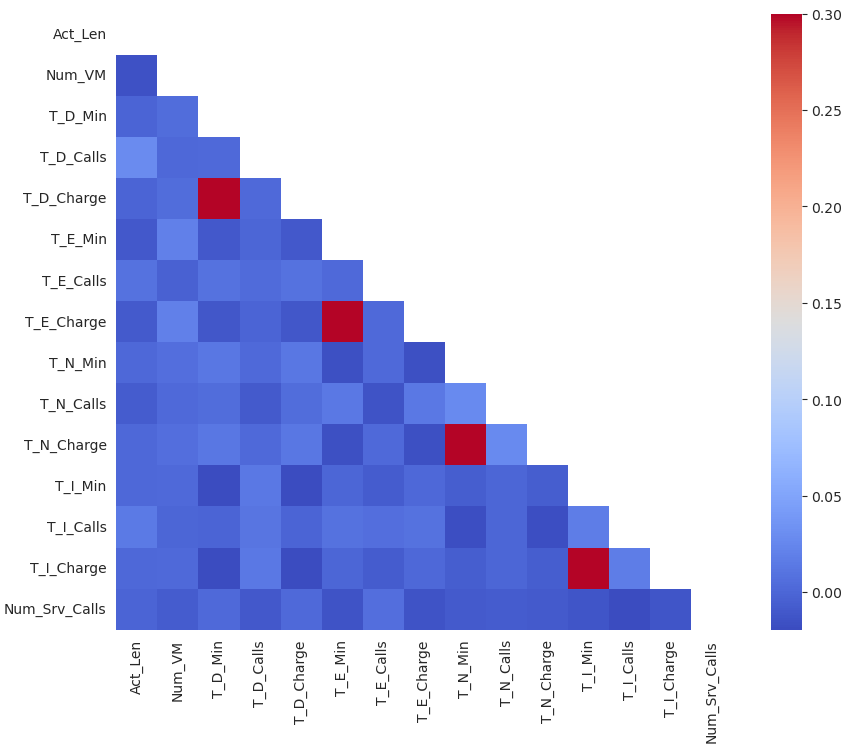

In [22]:
# Remove 'Int_Plan', 'VM_Plan', 'Churned' since these are categorical NOT continous.
df_mod = df.drop(columns=['Int_Plan', 'VM_Plan', 'Churned'], inplace=False)

corr = df_mod.corr(method='pearson')

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm")

In [23]:
df.head()

,Act_Len,Int_Plan,VM_Plan,Num_VM,T_D_Min,T_D_Calls,T_D_Charge,T_E_Min,T_E_Calls,T_E_Charge,T_N_Min,T_N_Calls,T_N_Charge,T_I_Min,T_I_Calls,T_I_Charge,Num_Srv_Calls,Churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.780000,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,17.052324,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.300000,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.260000,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.610000,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
# KEEP Churned, Int_Plan, VM_Plan
# Categorical vars only

# Keep & test Churned, Int_Plan
df_mod = df[['Int_Plan','Churned']]

df_mod.head()

,Int_Plan,Churned
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [25]:
# Find 2x2 contingency table for Fisher's test
Phi_a = df_mod[(df_mod['Int_Plan'] == 0) & (df_mod['Churned'] == 0)].count()

Phi_b = df_mod[(df_mod['Int_Plan'] == 0) & (df_mod['Churned'] == 1)].count()

Phi_c = df_mod[(df_mod['Int_Plan'] == 1) & (df_mod['Churned'] == 0)].count()

Phi_d = df_mod[(df_mod['Int_Plan'] == 1) & (df_mod['Churned'] == 1)].count()

In [26]:
# Fisher 2x2 Contingency Table

print('Phi_a =', Phi_a[0])
print('Phi_b =', Phi_b[0])
print('Phi_c =', Phi_c[0])
print('Phi_d =', Phi_d[0])

Phi_a = 4019
Phi_b = 508
Phi_c = 274
Phi_d = 199
